# Ruptures with ECG data 

**Motivation** change point detection with ECG data

In [3]:
# imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import ruptures as rpt
import os

In [ ]:
params = {
   'axes.labelsize': 8,
   'font.size': 15,
   'legend.fontsize': 15,
   'xtick.labelsize': 15,
   'ytick.labelsize': 15,
   'text.usetex': False,
   'figure.figsize': [15, 5]
   }
plt.rcParams.update(params)

In [4]:
cd ../../../Data/fusrp_2/2108new

C:\Users\Lauren\Data\fusrp_2


In [18]:
lab_data_path = "119_lab.csv"
df = pd.read_csv(lab_data_path, header=None)

In [21]:
lab_data_path = "119denoised.csv"
ddf = pd.read_csv(lab_data_path, header=None)

In [22]:
assert ddf.shape == df.drop(0, axis=1).shape

(751, 360)

In [122]:
samp_df = df[0:6]
samp_X = samp_df.drop(0, axis=1)
samp_y = np.ravel(samp_df[[0]].values)
samp_true_cpd = np.where(np.roll(samp_y,1)!=samp_y)[0]*360
samp_true_cpd = samp_true_cpd.tolist()
samp_true_cpd.append(int(len(np.ravel(samp_X))))

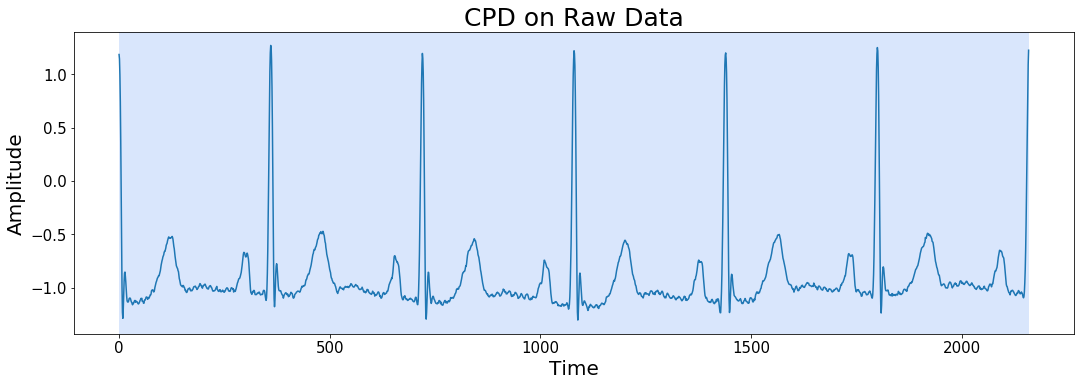

In [128]:
data = np.ravel(samp_X)
# data = np.ravel(ddf[648:655])
hb_pts = 360
# change point detection
model = "rbf"  # "l2", "rbf"
algo = rpt.Pelt(model=model, min_size=hb_pts, jump=20).fit(data)
my_bkps = algo.predict(pen=25)

# show results
fig, (ax,) = rpt.display(np.ravel(data), my_bkps, figsize=(15, 5))
plt.xlabel('Time', fontsize=20)
plt.ylabel('Amplitude', fontsize=20)
plt.title('CPD on Raw Data', fontsize=25)
plt.show()

In [26]:
cd ../pcadiffseq

C:\Users\Lauren\Data\fusrp_2


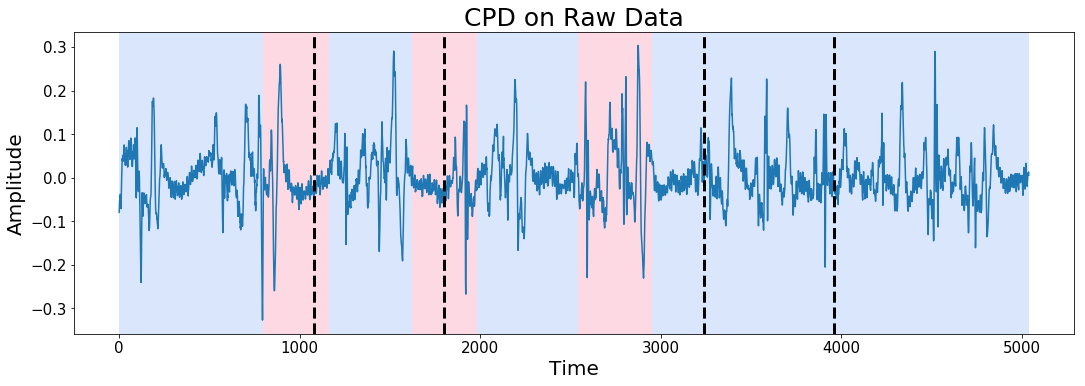

In [31]:
pca = 'x119'
lines = [float(line.rstrip('\n')) for line in open(pca)]
sig = np.ravel(lines)

data = sig[23*360:37*360]
hb_pts = 360
# change point detection
model = "rbf"  # "l2", "rbf"
algo = rpt.Pelt(model=model, min_size=hb_pts).fit(data)
my_bkps = algo.predict(pen=20)

# show results
fig, (ax,) = rpt.display(np.ravel(data), my_bkps, samp_true_cpd, figsize=(15, 5))
plt.xlabel('Time', fontsize=20)
plt.ylabel('Amplitude', fontsize=20)
plt.title('CPD on Raw Data', fontsize=25)
plt.show()

In [35]:
lab_data_path = "x119.csv"
pcadiff = pd.read_csv(lab_data_path, header=None)

In [40]:
pcadiff.shape

(751, 360)

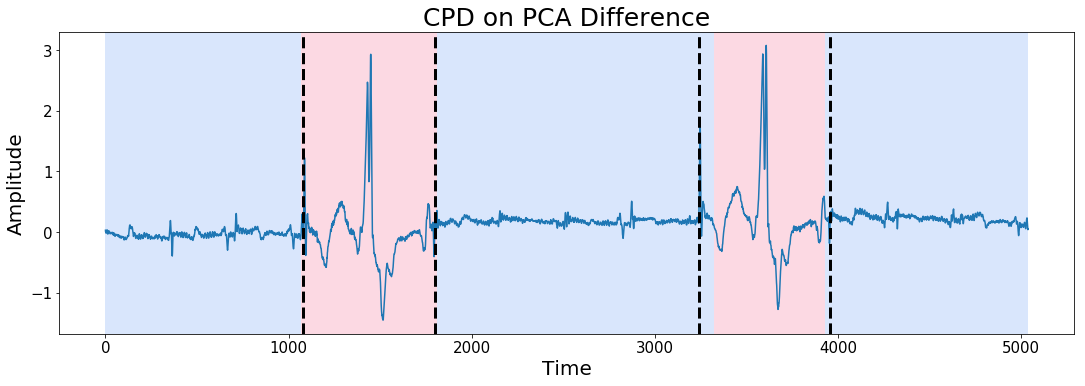

In [54]:
data = np.ravel(pcadiff[22:36])
# data = ddf[22*360:36*360]
hb_pts = 360
# change point detection
model = "rbf"  # "l2", "rbf"
algo = rpt.Pelt(model=model, min_size=hb_pts).fit(data)
my_bkps = algo.predict(pen=35)

# show results
fig, (ax,) = rpt.display(np.ravel(data), my_bkps, samp_true_cpd, figsize=(15, 5))
plt.xlabel('Time', fontsize=20)
plt.ylabel('Amplitude', fontsize=20)
plt.title('CPD on PCA Difference', fontsize=25)
plt.show()

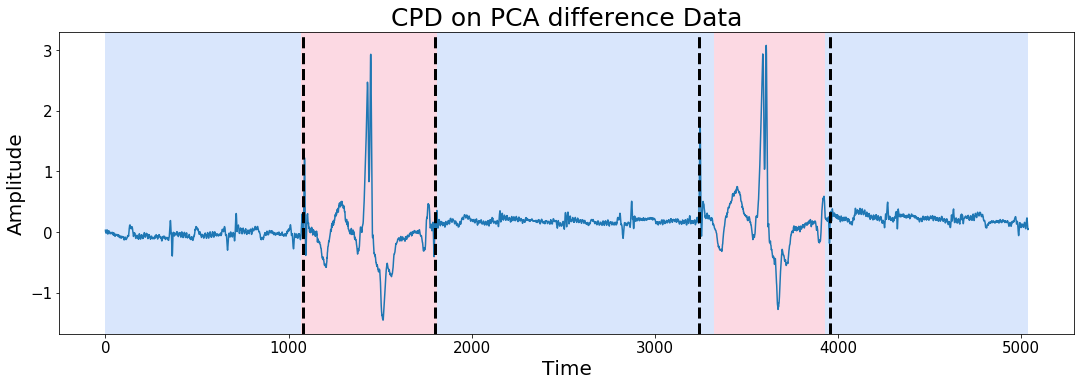

In [48]:
# show results
fig, (ax,) = rpt.display(np.ravel(data), my_bkps, samp_true_cpd, figsize=(15, 5))
plt.xlabel('Time', fontsize=20)
plt.ylabel('Amplitude', fontsize=20)
plt.title('CPD on PCA difference Data', fontsize=25)
plt.show()